# Моделирање Coronavirus податоци 
*** 

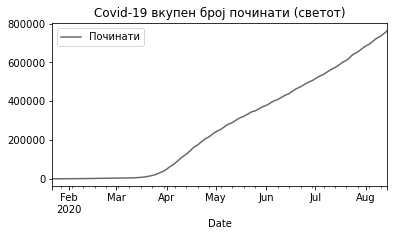

In [1]:
import numpy as np
import pandas as pd
import lmfit
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mpld3
from lmfit.lineshapes import gaussian, lorentzian
from scipy.integrate import odeint
import plotly.graph_objects as go
import plotly.tools as tls
from plotly.offline import plot, iplot, init_notebook_mode
from IPython.core.display import display, HTML
init_notebook_mode(connected = True)
config={'showLink': False, 'displayModeBar': False}
mpld3.enable_notebook()
%matplotlib inline 
pd.options.mode.chained_assignment = None  # default='warn'
warnings.filterwarnings('ignore')

# !! if you get a timeout-error, just click on the link and download the data manually !!

# read the data
beds = pd.read_csv("https://raw.githubusercontent.com/hf2000510/infectious_disease_modelling/master/data/beds.csv", header=0)
agegroups = pd.read_csv("https://raw.githubusercontent.com/hf2000510/infectious_disease_modelling/master/data/agegroups.csv")
probabilities = pd.read_csv("https://raw.githubusercontent.com/hf2000510/infectious_disease_modelling/master/data/probabilities.csv")
covid_data = pd.read_csv("https://tinyurl.com/t59cgxn", parse_dates=["Date"], skiprows=[1])
covid_data["Location"] = covid_data["Country/Region"]

# create some dicts for fast lookup
# 1. beds
beds_lookup = dict(zip(beds["Country"], beds["ICU_Beds"]))
# 2. agegroups
agegroup_lookup = dict(zip(agegroups['Location'], agegroups[['0_9', '10_19', '20_29', '30_39', '40_49', '50_59', '60_69', '70_79', '80_89', '90_100']].values))

# store the probabilities collected
prob_I_to_C_1 = list(probabilities.prob_I_to_ICU_1.values)
prob_I_to_C_2 = list(probabilities.prob_I_to_ICU_2.values)
prob_C_to_Death_1 = list(probabilities.prob_ICU_to_Death_1.values)
prob_C_to_Death_2 = list(probabilities.prob_ICU_to_Death_2.values)

plt.clf
covid_data.rename(columns = {'Value':'Починати'}, inplace = True)
covid_data.groupby("Date").sum()[["Починати"]].plot(
    figsize=(6, 3), 
    title="Covid-19 вкупен број починати (светот)",
    color="#696969"
)
covid_data.rename(columns = {'Починати':'Value'}, inplace = True)